# Nashville Music School (NMS) Nationality Analysis: Exploring Student Diversity


---

## Introduction


From 2015 to 2024, more than 100 students have engaged in private e-learning music lessons with me. Now, the burning question: Where in the world do these international students come from? *(Good Mythical Morning reference!)* There was such a diverse amount of students joining the school, I wanted to create a project that captures the experience that I gained.


## Python Libraries Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Import

I am using a consolidated Excel database without the students' names for confidentiality purposes

In [2]:
df = pd.read_csv('NMSNationalityData.csv')

In [3]:
df

,Country,Count
0,Belgium,3
1,Bolivia,1
2,Brazil,1
3,Croatia,2
4,Egypt,4
5,El Salvador,1
6,England,9
7,Ethiopia,1
8,Fiji,1
9,France,10


## Total of Students at Nashville Music School

In [4]:
total_students = df['Count'].sum()
total_students

100

## Plot

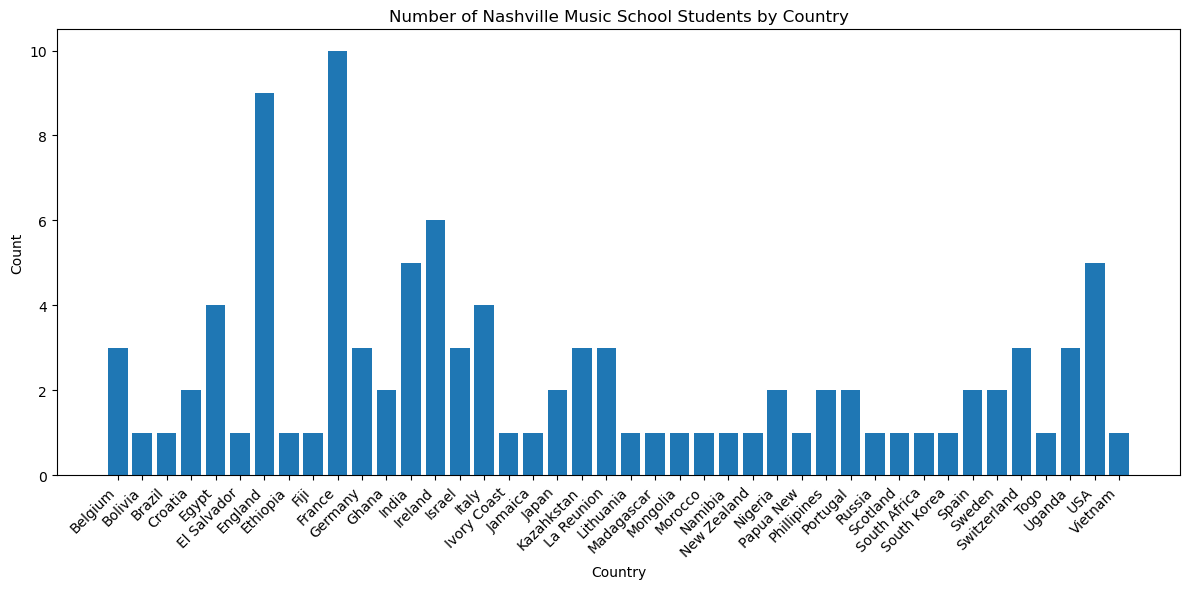

In [5]:
plt.figure(figsize=(12,6))
plt.bar(df['Country'], df['Count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Nashville Music School Students by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The majority of the students would be from France, England, India, Ireland and the USA as Geneva is a very diverse francophone and anglophone region. The region of [Auvergne-Rhône-Alpes](https://en.wikipedia.org/wiki/Auvergne-Rh%C3%B4ne-Alpes) in France, is primarily French speaking, so that would explain the high amounts of students from France attending.

### Data Sorting by Count

In [6]:
df_sorted = df.sort_values(by='Count', ascending=False)

# Display the sorted list of countries
sorted_countries_list = df_sorted[['Country', 'Count']]
print(sorted_countries_list.to_string(index=False))

     Country  Count
      France     10
     England      9
     Ireland      6
       India      5
         USA      5
       Egypt      4
       Italy      4
     Belgium      3
  La Reunion      3
  Kazahkstan      3
      Israel      3
      Uganda      3
 Switzerland      3
     Germany      3
       Japan      2
 Phillipines      2
    Portugal      2
     Croatia      2
       Ghana      2
       Spain      2
      Sweden      2
     Nigeria      2
 South Korea      1
South Africa      1
    Scotland      1
      Russia      1
        Togo      1
   Papua New      1
   Lithuania      1
 New Zealand      1
     Namibia      1
     Morocco      1
    Mongolia      1
  Madagascar      1
     Bolivia      1
     Jamaica      1
 Ivory Coast      1
        Fiji      1
    Ethiopia      1
 El Salvador      1
      Brazil      1
     Vietnam      1


# Frequency Analysis

### Most Frequent

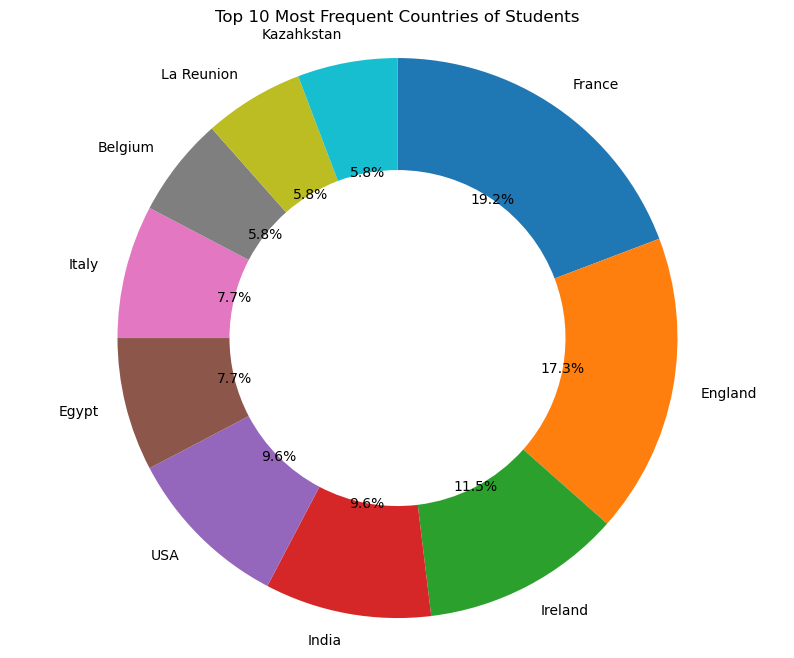

In [7]:
df = df.sort_values(by='Count', ascending=False)

top_countries = 10
df_top = df.head(top_countries)

plt.figure(figsize=(10, 8))
plt.pie(df_top['Count'], labels=df_top['Country'], autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.axis('equal')  
plt.title('Top 10 Most Frequent Countries of Students')
plt.show()

In [8]:
print(df_top.to_string(index=False))

   Country  Count
    France     10
   England      9
   Ireland      6
     India      5
       USA      5
     Egypt      4
     Italy      4
   Belgium      3
La Reunion      3
Kazahkstan      3


### Least Frequent

In [9]:
df_lowest_counts = df[df['Count'].isin([1, 2])]

df_lowest_counts_sorted = df_lowest_counts.sort_values(by='Count')

sorted_lowest_counts_list = df_lowest_counts_sorted[['Country', 'Count']]
print(sorted_lowest_counts_list.to_string(index=False))

     Country  Count
   Papua New      1
 El Salvador      1
    Ethiopia      1
        Fiji      1
 Ivory Coast      1
     Jamaica      1
     Bolivia      1
  Madagascar      1
    Mongolia      1
     Morocco      1
     Namibia      1
 New Zealand      1
   Lithuania      1
     Vietnam      1
        Togo      1
      Russia      1
    Scotland      1
South Africa      1
 South Korea      1
      Brazil      1
     Nigeria      2
      Sweden      2
       Spain      2
       Ghana      2
     Croatia      2
    Portugal      2
 Phillipines      2
       Japan      2


These nationalities were least frequently found at the school.

# Statistics

### Annual Retention Statistics

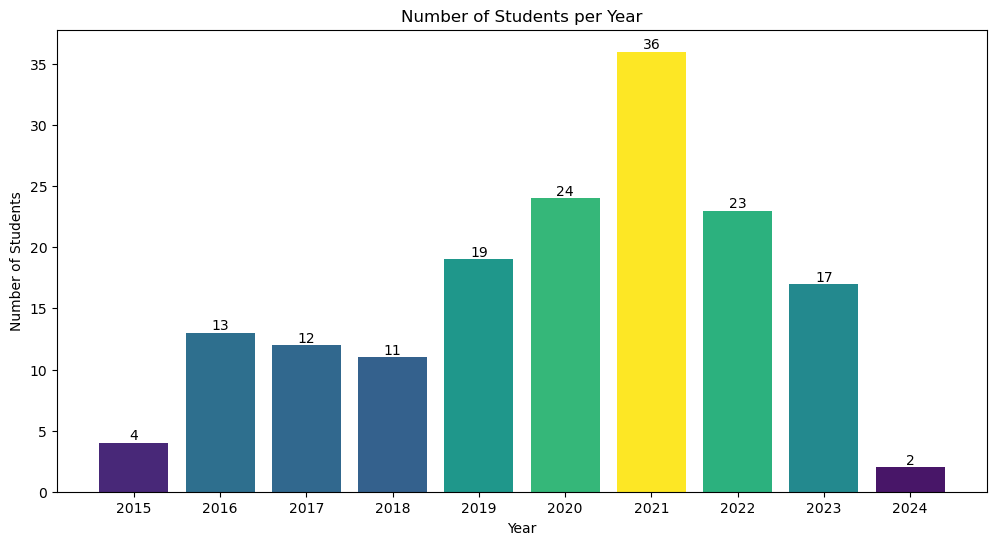

In [10]:
data = {'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        'Number of Students': [4, 13, 12, 11, 19, 24, 36, 23, 17, 2]}

df_students_per_year = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(df_students_per_year['Number of Students'] / max(df_students_per_year['Number of Students']))
bars = plt.bar(df_students_per_year['Year'], df_students_per_year['Number of Students'], color=colors)

plt.xticks(df_students_per_year['Year'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Number of Students per Year')
plt.show()

This plot illustrates the total number of students per year, capturing a dynamic snapshot of the music school's growth and evolution. It's noteworthy that the student body comprises individuals with varying durations of engagement, including those who enrolled once, stayed for multiple years, took breaks, or returned later.

### Average amount of students during pandemic years

In [11]:
df_students_per_year = pd.DataFrame(data)

df_selected_years = df_students_per_year[(df_students_per_year['Year'] >= 2019) & (df_students_per_year['Year'] <= 2023)]

average_students = df_selected_years['Number of Students'].mean()
std_deviation_students = df_selected_years['Number of Students'].std()
min_students = df_selected_years['Number of Students'].min()
max_students = df_selected_years['Number of Students'].max()

print(f"Statistics for the years 2019-2023:")
print(f"Average Number of Students: {average_students:.2f}")
print(f"Standard Deviation: {std_deviation_students:.2f}")
print(f"Minimum Number of Students: {min_students}")
print(f"Maximum Number of Students: {max_students}")


Statistics for the years 2019-2023:
Average Number of Students: 23.80
Standard Deviation: 7.40
Minimum Number of Students: 17
Maximum Number of Students: 36


### Total Student Count (Including Recurring)

In [12]:
df_students_per_year = pd.DataFrame(data)

total_students = df_students_per_year['Number of Students'].sum()

print(f"Total Number of Students: {total_students}")

Total Number of Students: 161


# Conclusions


### Where are they from? 
Given the data on the number of students, **English-speaking** and **French-speaking** students have the highest numbers in frequencies. 

### What does this imply?
This observation implies Geneva's appeal as an educational hub, particularly for those interested in traditional [African-American standardized music](https://en.wikipedia.org/wiki/African-American_music) courses. The diverse student representation aligns seamlessly with Geneva's international and multicultural environment.


### Pandemic?
Despite the challenges posed by the global pandemic, the music school witnessed a remarkable surge in student enrollment, reaching its peak between 2019 and 2022. This resilience and sustained interest in music education during challenging times reflect the enduring impact and significance of the institution.

### Statistics
The diversity of student experiences, including those who stayed for several years, pursued education abroad, or returned after breaks, contributes to the rich tapestry of the music school's history. Each year tells a unique story of musical growth and shared learning experiences. The correlation between student enrollment and the linguistic diversity of the region underscores the inclusive and international nature in Geneva.


# Socials

Follow me on:
- [GitHub](https://github.com/JoshuaSamuelNichols)
- [LinkedIn](https://www.linkedin.com/in/mrnichols/)
- [Medium](https://medium.com/@nichols.tech)
- [Main Instagram](https://instagram.com/Nichols.Tech)
- [NMS Instagram](https://instagram.com/NashvilleMusicSchool)
- [NMS Facebook](https://facebook.com/NashvilleMusicSchool)

**Disclaimer:**

The information presented in this document is provided by Nashville Music School (NMS), a legal business registered with the French Registry of Businesses and Enterprises. NMS is committed to offering accurate and reliable data to the best of its ability. However, the content is intended for informational purposes only and should not be considered as professional advice.

NMS complies with the General Data Protection Regulation [GDPR](https://gdpr.eu/) and actively practices data privacy.


*Thank you for your understanding.*
